## Modulos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----------------------------------------------

## Cargando dataset

In [2]:
df = pd.read_csv('diabetes.txt', sep='|')

In [3]:
print(df.shape)

(442, 11)


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Transformación de variables

In [6]:
print(df['sex'].value_counts())

sex
1.0    235
2.0    207
Name: count, dtype: int64


In [7]:
df['sex'] = np.where(df['sex']==1,'Male','Female')
print(df['sex'].value_counts())

sex
Male      235
Female    207
Name: count, dtype: int64


In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,Female,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,Male,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,Female,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,Male,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,Male,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Count'>

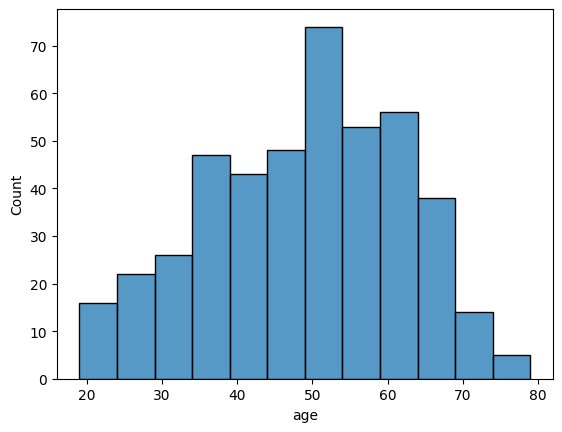

In [9]:
print(df['age'].describe())
sns.histplot(data=df, x="age")

<Axes: xlabel='age', ylabel='Count'>

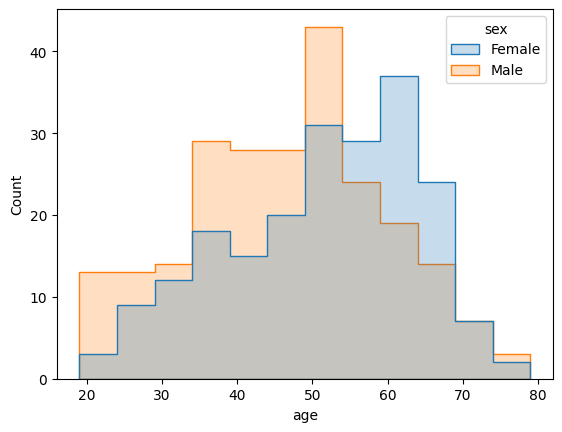

In [10]:
sns.histplot(data=df, x="age", hue="sex", element="step")

<Axes: xlabel='sex', ylabel='age'>

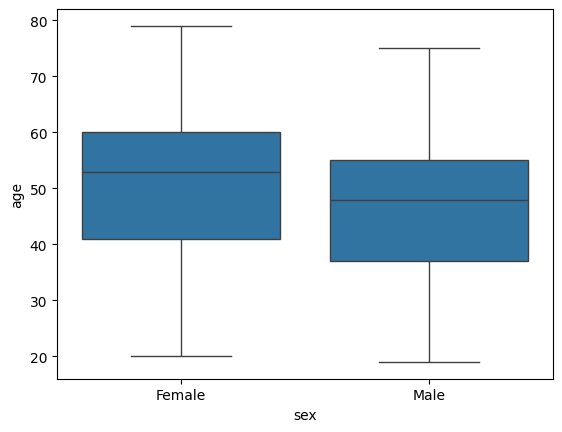

In [11]:
sns.boxplot(data=df, x="sex", y="age")

In [12]:
condlist = [(df['age']>=18)&(df['age']<40),
            (df['age']>=40)&(df['age']<60),
            (df['age']>=60)]
choicelist = ['Joven', 'Adulto', 'Anciano']
df['age_group']=np.select(condlist, choicelist)
print(df['age_group'].value_counts())

age_group
Adulto     222
Joven      117
Anciano    103
Name: count, dtype: int64


<Axes: xlabel='age_group', ylabel='count'>

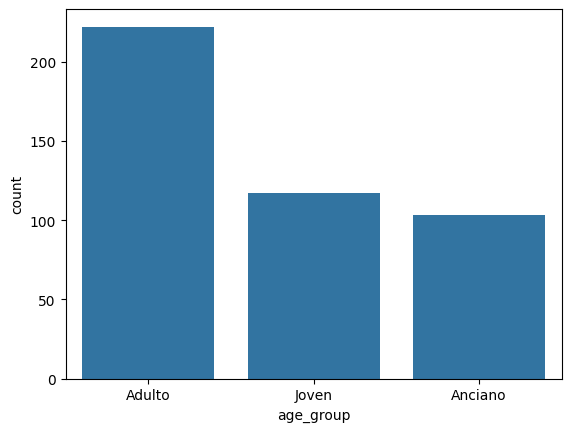

In [13]:
sns.barplot(df['age_group'].value_counts())

count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: bmi, dtype: float64


<Axes: xlabel='bmi', ylabel='Count'>

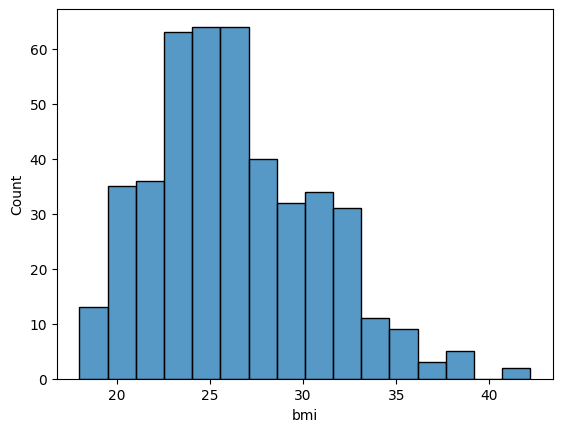

In [14]:
print(df['bmi'].describe())
sns.histplot(data=df, x="bmi")

In [15]:
condlist = [(df['bmi']<18.5),
            (df['bmi']>=18.5)&(df['bmi']<25),
            (df['bmi']>=25)&(df['bmi']<30),
            (df['bmi']>=30)&(df['bmi']<35),
            (df['bmi']>=35)&(df['bmi']<40),
            (df['bmi']>=40)]
choicelist = ['Peso_bajo', 'Peso_normal','Sobrepeso', 'Obesidad_leve', 'Obesidad_media', 'Obesidad_morbida']
df['bmi_group'] = np.select(condlist, choicelist)
df['bmi_group'].value_counts()

bmi_group
Peso_normal         186
Sobrepeso           155
Obesidad_leve        80
Obesidad_media       17
Obesidad_morbida      2
Peso_bajo             2
Name: count, dtype: int64

<Axes: xlabel='bmi_group', ylabel='bp'>

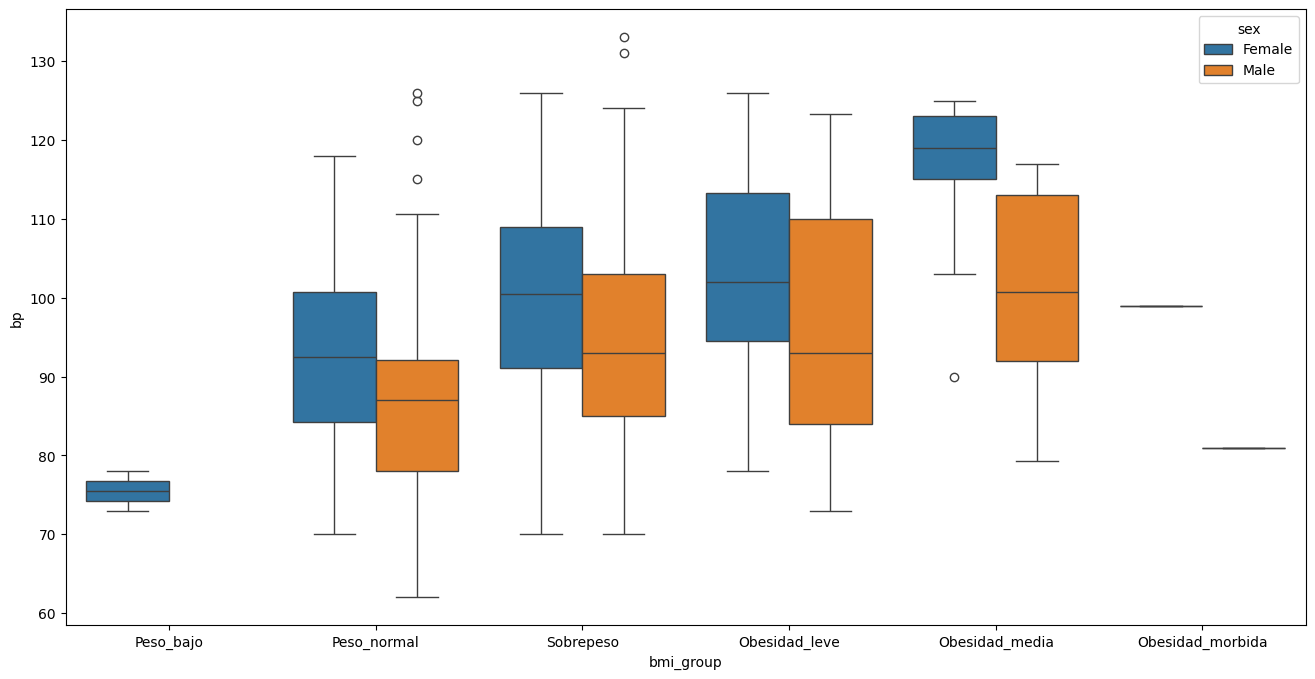

In [16]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x="bmi_group", y="bp", hue="sex", order=['Peso_bajo', 'Peso_normal','Sobrepeso', 'Obesidad_leve', 'Obesidad_media', 'Obesidad_morbida'])

<Axes: xlabel='bp', ylabel='bmi'>

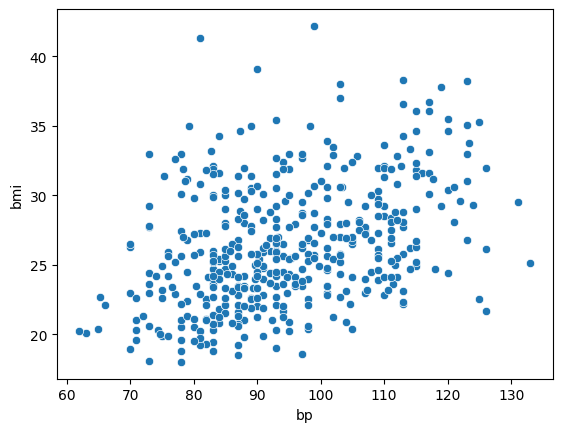

In [17]:
sns.scatterplot(data=df, x="bp", y="bmi")

-------------------------------

## Guardando

In [18]:
df.to_csv('diabetes_transform.txt', sep='|', index=False)